<a href="https://colab.research.google.com/github/TiFcode/TiFai/blob/main/2023-01-08--11-30%20-%20SNAPSHOT_DO_NOT_EDIT_GOOD_TRAINING_GOOD_OUTPUT_TiFai_tif3_object_recognition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('*** START PROGRAM ********************************************************')

outputDetails = False
outputInfo = True
image_pixels_X = 224
image_pixels_Y = 224
googleDriveFolderPath = '/content/drive/My Drive/Personal/Dev/ChatGPT/2023-01-05 - AI - object recognition/'
# see the cell below for help on setting the value for googleDriveFolderPath

*** START PROGRAM ********************************************************


In [ ]:
# To get the value for googleDriveFolderPath, you can use the following code, then comment back this cell.

"""
from google.colab import drive
import glob
drive.mount('/content/drive')
pattern = '/content/drive/My Drive/**/*20230105_151957.jpg'
filenames = glob.glob(pattern, recursive=True)
print(filenames)
"""

"\nfrom google.colab import drive\nimport glob\ndrive.mount('/content/drive')\npattern = '/content/drive/My Drive/**/*20230105_151957.jpg'\nfilenames = glob.glob(pattern, recursive=True)\nprint(filenames)\n"

In [ ]:
from google.colab.patches import cv2_imshow

def display_image(image, description):
  print(f'{description}:')
  print(f'Image size: {image.shape}')
  cv2_imshow(image)


In [ ]:
import inspect

def retrieve_variable_name_from_local(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
    
def retrieve_variable_name_from_call(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def textForVar(variable):
  return f'{retrieve_variable_name_from_call(variable)} is [{variable}]'

def textForVarWithDesc(variable, description):
  return f'{description} is [{variable}]'

def printInfo(text):
  if outputInfo:
    print(text)

In [ ]:
from google.colab import drive
import glob
!pwd
!ls
# Mount Google Drive
drive.mount('/content/drive')
!pwd
!ls

/content
drive  sample_data
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data


In [ ]:
import os
import cv2

def loadAndProcessAllFilesFromFolder(folderPath):
  filenames = os.listdir(folderPath)

  imagesArray = []
  for filename in filenames:
    filenameFullPath = folderPath + filename
    if outputDetails:
      print(f'Found file [{filename}] with size [{os.stat(filenameFullPath).st_size}] bytes.')
    
    image = cv2.imread(filenameFullPath)
    if outputDetails:
      display_image(image, filenameFullPath)
    imagesArray.append(image)

    if outputDetails:
      print(f'imagesArray contains [{len(imagesArray)}] elements.')

  # Convert the images to a format that can be used as input to a CNN
  imagesArray = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in imagesArray]

  return imagesArray

In [ ]:
def load_images(folderName):
  print(f'Loading {folderName}...')
  images = loadAndProcessAllFilesFromFolder(googleDriveFolderPath + folderName + '/')
  print(f'{folderName} contains [{len(images)}] images.')
  return images

training_images_yes = load_images('training_images_yes')
training_images_non = load_images('training_images_non')
validation_images_yes = load_images('validation_images_yes')
validation_images_non = load_images('validation_images_non')
search_images = load_images('search_images')

print('*** FINISH LOADING IMAGES ********************************************************')


Loading training_images_yes...
training_images_yes contains [10] images.
Loading training_images_non...
training_images_non contains [11] images.
Loading validation_images_yes...
validation_images_yes contains [3] images.
Loading validation_images_non...
validation_images_non contains [3] images.
Loading search_images...
search_images contains [27] images.
*** FINISH LOADING IMAGES ********************************************************


In [ ]:
"""
from sklearn.model_selection import train_test_split

# Split the object images automatically into a training set and a validation set
X_train, X_val = train_test_split(object_images, test_size=0.2, random_state=42)
"""

'\nfrom sklearn.model_selection import train_test_split\n\n# Split the object images automatically into a training set and a validation set\nX_train, X_val = train_test_split(object_images, test_size=0.2, random_state=42)\n'

In [ ]:
import numpy as np

def prepare_array(list_of_images):
  print(f'START: Preparing array [{retrieve_variable_name_from_call(list_of_images)}] ...')

  # Convert the list to numpy array
  printInfo(textForVarWithDesc(type(list_of_images), "type(list_of_images)"))
  printInfo(textForVarWithDesc(len(list_of_images), "len(list_of_images)"))
  array_of_images = np.array(list_of_images)
  printInfo(textForVarWithDesc(type(array_of_images), "type(array_of_images)"))
  printInfo(textForVarWithDesc(array_of_images.shape[0], "array_of_images.shape[0]"))

  printInfo(textForVarWithDesc(array_of_images.shape, "array_of_images.shape"))

  print(f'END: Preparing array [{retrieve_variable_name_from_call(list_of_images)}].\n\n\n')

  return array_of_images

# Preparing the image arrays
training_images_yes = prepare_array(training_images_yes)
training_images_non = prepare_array(training_images_non)
validation_images_yes = prepare_array(validation_images_yes)
validation_images_non = prepare_array(validation_images_non)

target_labels_of_training_images_yes = np.ones(training_images_yes.shape[0])
target_labels_of_training_images_non = np.zeros(training_images_non.shape[0])
target_labels_of_validation_images_yes = np.ones(validation_images_yes.shape[0])
target_labels_of_validation_images_non = np.zeros(validation_images_non.shape[0])

training_images = np.concatenate((training_images_yes, training_images_non))
validation_images = np.concatenate((validation_images_yes, validation_images_non))
target_labels_of_training_images = np.concatenate((target_labels_of_training_images_yes, target_labels_of_training_images_non))
target_labels_of_validation_images = np.concatenate((target_labels_of_validation_images_yes, target_labels_of_validation_images_non))

search_images = prepare_array(search_images)

printInfo(textForVarWithDesc(training_images.shape, "training_images.shape"))
printInfo(textForVarWithDesc(validation_images.shape, "validation_images.shape"))
printInfo(textForVarWithDesc(target_labels_of_training_images.shape, "target_labels_of_training_images.shape"))
printInfo(textForVarWithDesc(target_labels_of_validation_images.shape, "target_labels_of_validation_images.shape"))
printInfo(textForVarWithDesc(search_images.shape, "search_images.shape"))


START: Preparing array [['training_images_yes']] ...
type(list_of_images) is [<class 'list'>]
len(list_of_images) is [10]
type(array_of_images) is [<class 'numpy.ndarray'>]
array_of_images.shape[0] is [10]
array_of_images.shape is [(10, 224, 224, 3)]
END: Preparing array [['training_images_yes']].



START: Preparing array [['training_images_non']] ...
type(list_of_images) is [<class 'list'>]
len(list_of_images) is [11]
type(array_of_images) is [<class 'numpy.ndarray'>]
array_of_images.shape[0] is [11]
array_of_images.shape is [(11, 224, 224, 3)]
END: Preparing array [['training_images_non']].



START: Preparing array [['validation_images_yes']] ...
type(list_of_images) is [<class 'list'>]
len(list_of_images) is [3]
type(array_of_images) is [<class 'numpy.ndarray'>]
array_of_images.shape[0] is [3]
array_of_images.shape is [(3, 224, 224, 3)]
END: Preparing array [['validation_images_yes']].



START: Preparing array [['validation_images_non']] ...
type(list_of_images) is [<class 'list'

In [ ]:
#@title
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_pixels_X, image_pixels_Y, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
training_batch_size = training_images.shape[0]
history = model.fit(training_images, target_labels_of_training_images, batch_size=training_batch_size, epochs=100, validation_data=(validation_images, target_labels_of_validation_images))


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 6.2346 - accuracy: 0.6190 - val_loss: 19344.8691 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 18756.5684 - accuracy: 0.5238 - val_loss: 7337.1055 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 7110.9619 - accuracy: 0.5238 - val_loss: 2619.9258 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 47ms/step - loss: 2028.3143 - accuracy: 0.4762 - val_loss: 3628.7305 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 55ms/step - loss: 2776.3145 - accuracy: 0.4762 - val_loss: 2281.6399 - val_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 46ms/step - loss: 1624.6748 - accuracy: 0.4762 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1303.8065 - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 64)                25233472  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,234,433
Trainable params: 25,234,433
Non-trainable params: 0
____________________________________________

To visualize the features extracted by a convolutional neural network (CNN), we can use the matplotlib library to plot the feature maps produced by the filters in the different layers of the CNN.

In this example, the feature maps are extracted from the CNN by creating a new model that maps the input to the feature maps produced by the convolutional layer. The feature maps are then predicted for a given input image and plotted using imshow(). We can adjust the number of rows and columns in the plot by changing the values of 8 and 4 in the subplot() function.

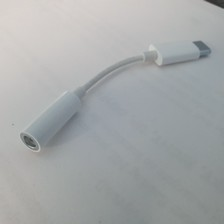

In [ ]:
cv2_imshow(training_images[0]) 

In [ ]:
# Import the necessary modules
import matplotlib.pyplot as plt
from keras.models import Model

# Extract the feature maps from the CNN
feature_maps = model.get_layer('conv2d').output

# Create a model that maps the input to the feature maps
feature_map_model = Model(inputs=model.input, outputs=feature_maps)

# Use the model to predict the feature maps for an input image
input_image = np.expand_dims(training_images[0], axis=0)
feature_maps = feature_map_model.predict(input_image)



1/1 [==============================] - 0s 86ms/step


len(feature_maps[0]) is [222]


Value of i is [0]
feature_map.shape is [(222, 32)]


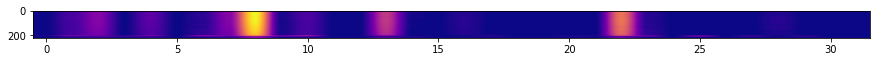



Value of i is [1]
feature_map.shape is [(222, 32)]


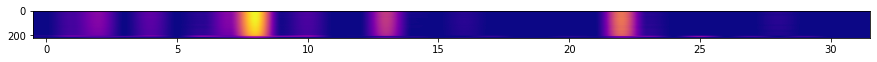



Value of i is [2]
feature_map.shape is [(222, 32)]


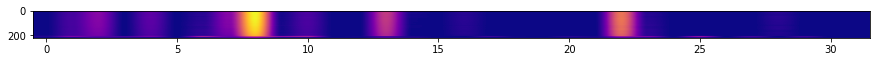



Value of i is [3]
feature_map.shape is [(222, 32)]


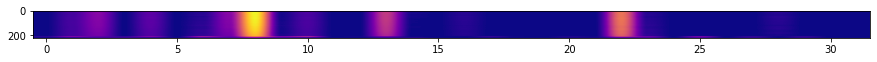



Value of i is [4]
feature_map.shape is [(222, 32)]


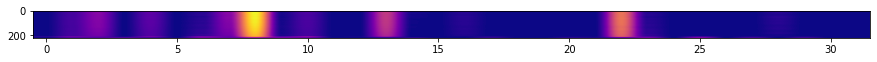



Value of i is [5]
feature_map.shape is [(222, 32)]


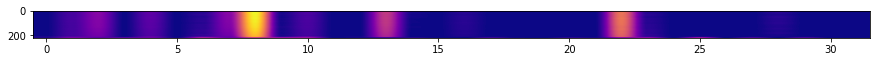



Value of i is [6]
feature_map.shape is [(222, 32)]


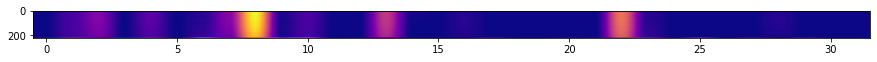



Value of i is [7]
feature_map.shape is [(222, 32)]


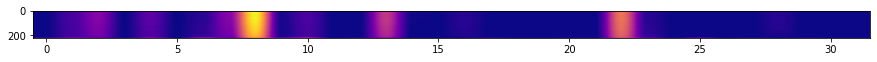



Value of i is [8]
feature_map.shape is [(222, 32)]


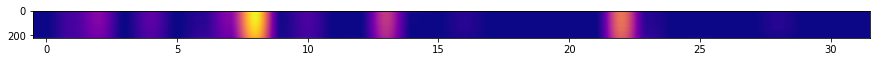



Value of i is [9]
feature_map.shape is [(222, 32)]


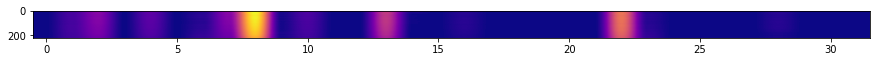



Value of i is [10]
feature_map.shape is [(222, 32)]


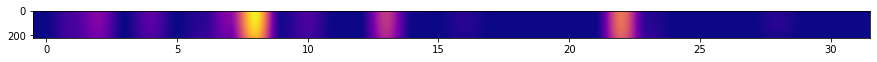



Value of i is [11]
feature_map.shape is [(222, 32)]


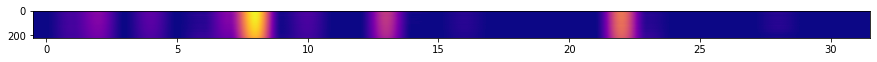



Value of i is [12]
feature_map.shape is [(222, 32)]


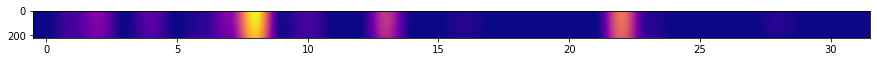



Value of i is [13]
feature_map.shape is [(222, 32)]


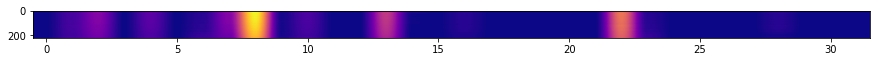



Value of i is [14]
feature_map.shape is [(222, 32)]


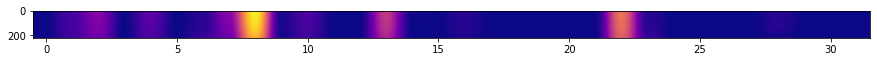



Value of i is [15]
feature_map.shape is [(222, 32)]


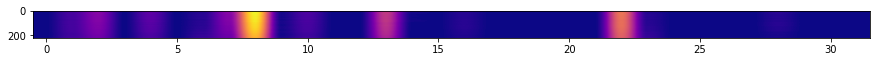



Value of i is [16]
feature_map.shape is [(222, 32)]


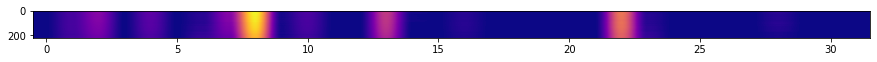



Value of i is [17]
feature_map.shape is [(222, 32)]


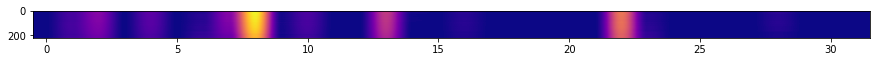



Value of i is [18]
feature_map.shape is [(222, 32)]


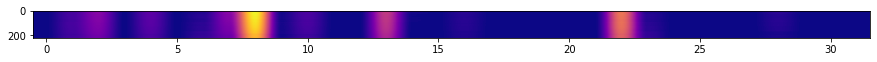



Value of i is [19]
feature_map.shape is [(222, 32)]


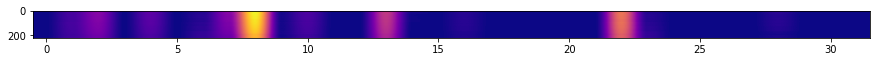



Value of i is [20]
feature_map.shape is [(222, 32)]


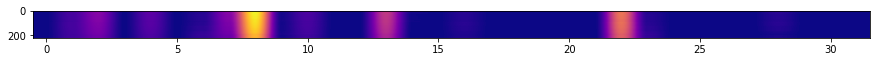



Value of i is [21]
feature_map.shape is [(222, 32)]


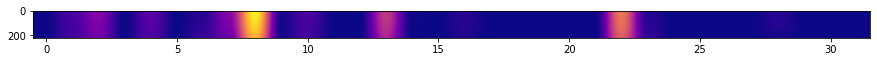



Value of i is [22]
feature_map.shape is [(222, 32)]


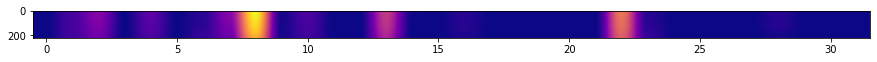



Value of i is [23]
feature_map.shape is [(222, 32)]


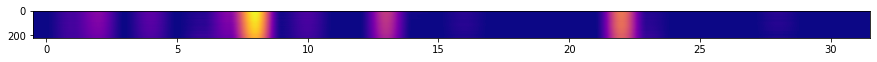



Value of i is [24]
feature_map.shape is [(222, 32)]


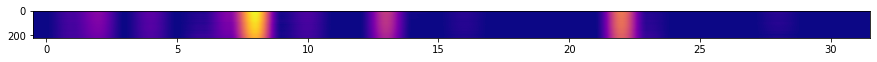



Value of i is [25]
feature_map.shape is [(222, 32)]


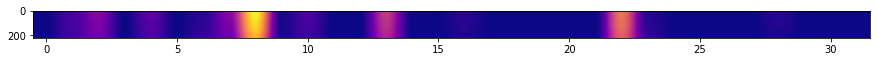



Value of i is [26]
feature_map.shape is [(222, 32)]


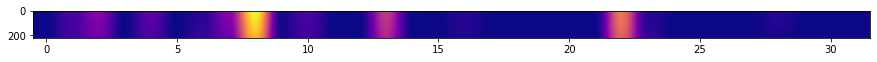



Value of i is [27]
feature_map.shape is [(222, 32)]


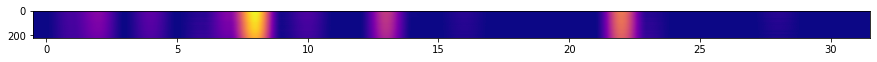



Value of i is [28]
feature_map.shape is [(222, 32)]


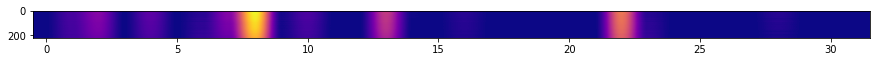



Value of i is [29]
feature_map.shape is [(222, 32)]


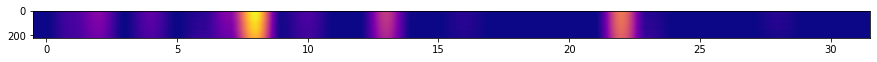



Value of i is [30]
feature_map.shape is [(222, 32)]


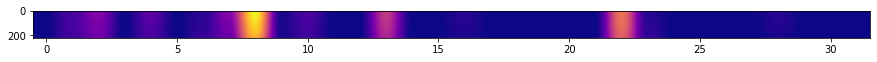



Value of i is [31]
feature_map.shape is [(222, 32)]


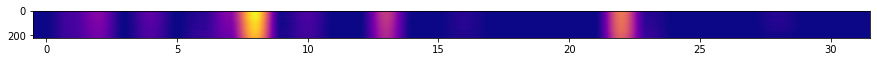



Value of i is [32]
feature_map.shape is [(222, 32)]


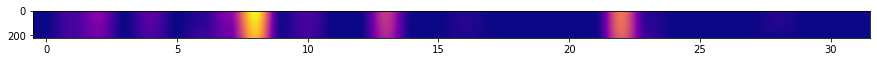



Value of i is [33]
feature_map.shape is [(222, 32)]


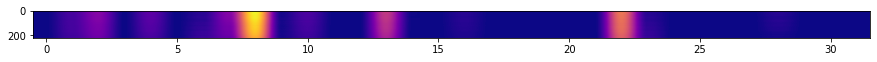



Value of i is [34]
feature_map.shape is [(222, 32)]


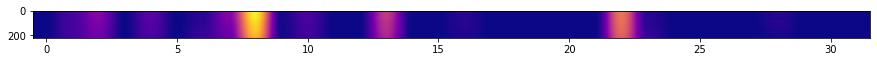



Value of i is [35]
feature_map.shape is [(222, 32)]


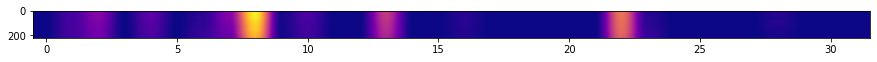



Value of i is [36]
feature_map.shape is [(222, 32)]


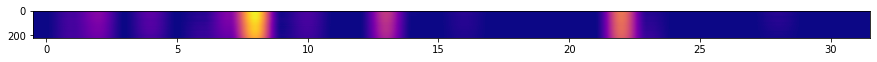



Value of i is [37]
feature_map.shape is [(222, 32)]


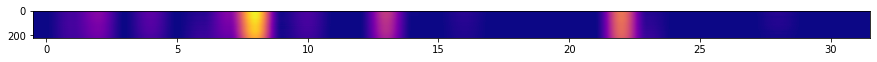



Value of i is [38]
feature_map.shape is [(222, 32)]


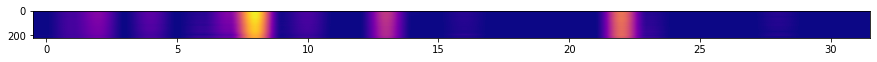



Value of i is [39]
feature_map.shape is [(222, 32)]


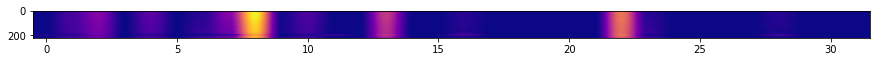



Value of i is [40]
feature_map.shape is [(222, 32)]


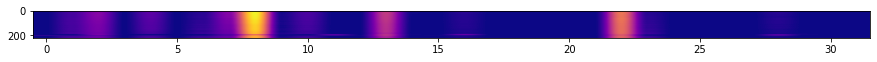



Value of i is [41]
feature_map.shape is [(222, 32)]


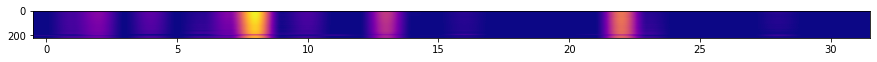



Value of i is [42]
feature_map.shape is [(222, 32)]


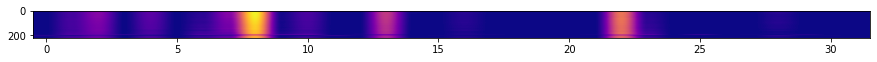



Value of i is [43]
feature_map.shape is [(222, 32)]


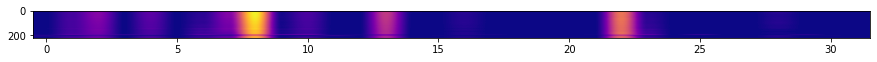



Value of i is [44]
feature_map.shape is [(222, 32)]


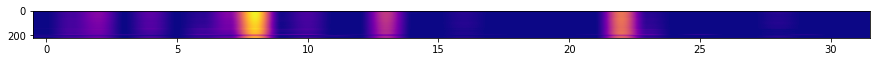



Value of i is [45]
feature_map.shape is [(222, 32)]


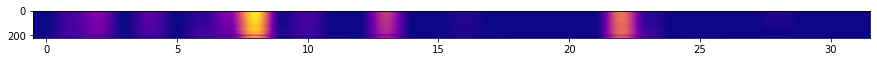



Value of i is [46]
feature_map.shape is [(222, 32)]


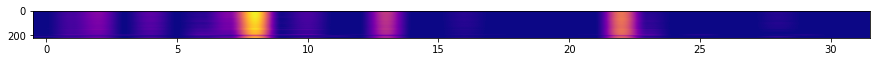



Value of i is [47]
feature_map.shape is [(222, 32)]


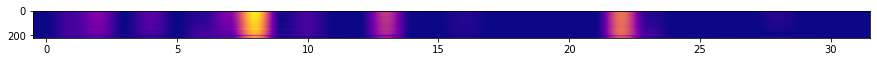



Value of i is [48]
feature_map.shape is [(222, 32)]


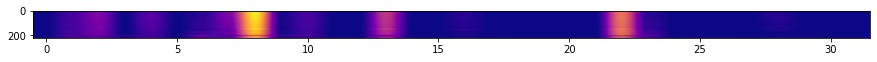



Value of i is [49]
feature_map.shape is [(222, 32)]


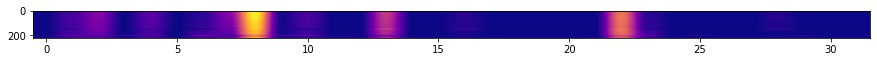



Value of i is [50]
feature_map.shape is [(222, 32)]


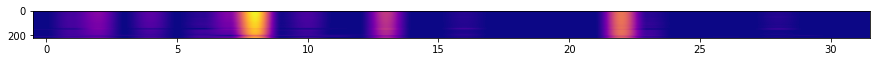



Value of i is [51]
feature_map.shape is [(222, 32)]


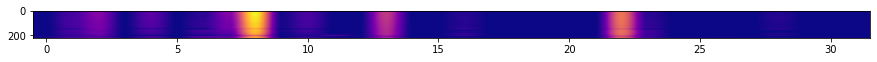



Value of i is [52]
feature_map.shape is [(222, 32)]


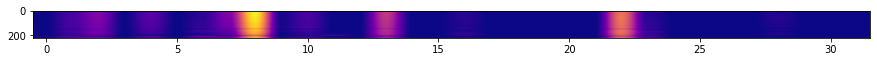



Value of i is [53]
feature_map.shape is [(222, 32)]


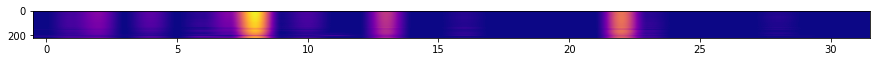



Value of i is [54]
feature_map.shape is [(222, 32)]


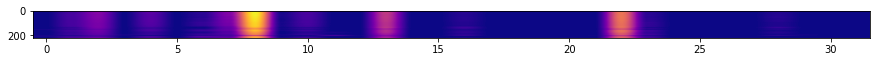



Value of i is [55]
feature_map.shape is [(222, 32)]


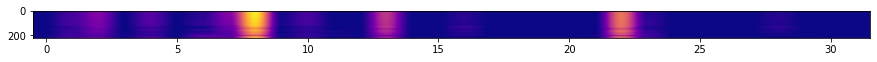



Value of i is [56]
feature_map.shape is [(222, 32)]


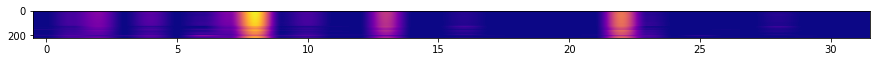



Value of i is [57]
feature_map.shape is [(222, 32)]


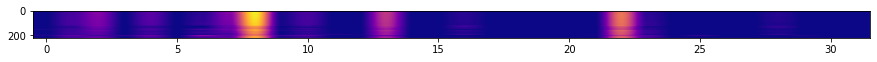



Value of i is [58]
feature_map.shape is [(222, 32)]


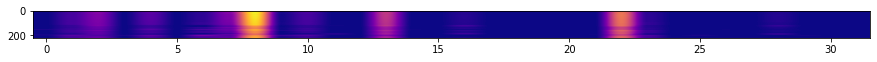



Value of i is [59]
feature_map.shape is [(222, 32)]


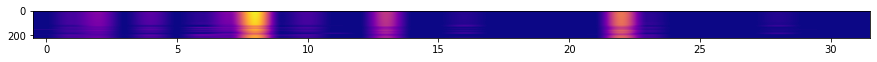



Value of i is [60]
feature_map.shape is [(222, 32)]


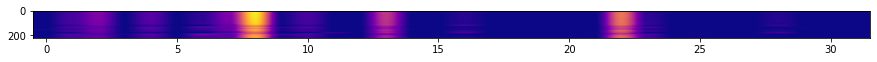



Value of i is [61]
feature_map.shape is [(222, 32)]


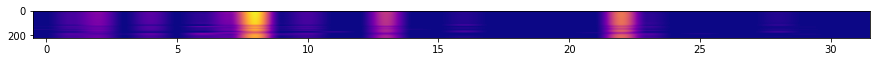



Value of i is [62]
feature_map.shape is [(222, 32)]


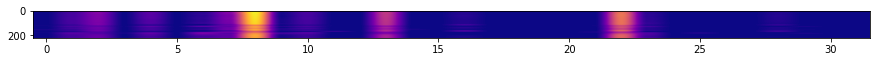



Value of i is [63]
feature_map.shape is [(222, 32)]


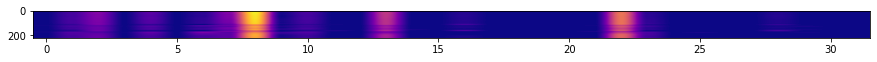



Value of i is [64]
feature_map.shape is [(222, 32)]


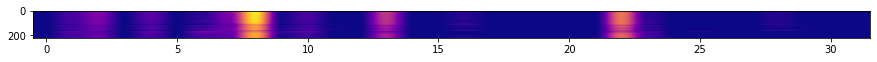



Value of i is [65]
feature_map.shape is [(222, 32)]


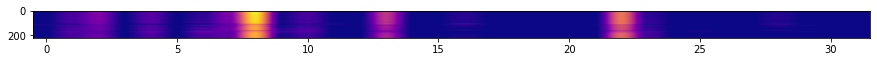



Value of i is [66]
feature_map.shape is [(222, 32)]


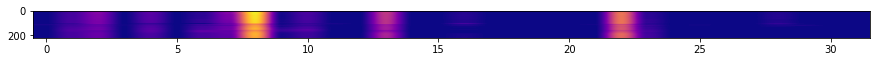



Value of i is [67]
feature_map.shape is [(222, 32)]


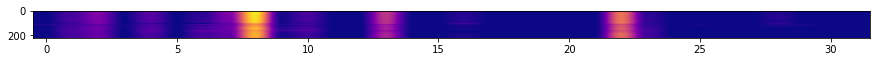



Value of i is [68]
feature_map.shape is [(222, 32)]


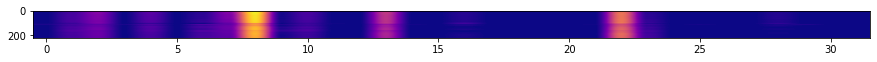



Value of i is [69]
feature_map.shape is [(222, 32)]


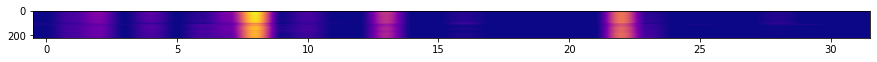



Value of i is [70]
feature_map.shape is [(222, 32)]


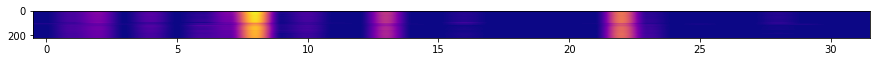



Value of i is [71]
feature_map.shape is [(222, 32)]


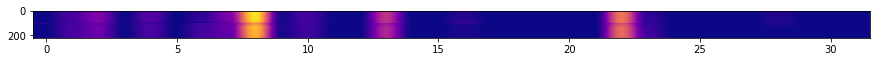



Value of i is [72]
feature_map.shape is [(222, 32)]


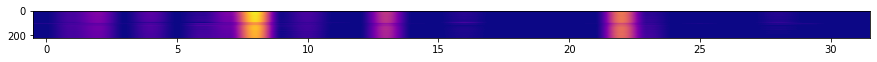



Value of i is [73]
feature_map.shape is [(222, 32)]


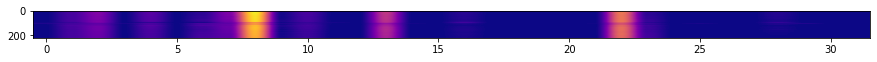



Value of i is [74]
feature_map.shape is [(222, 32)]


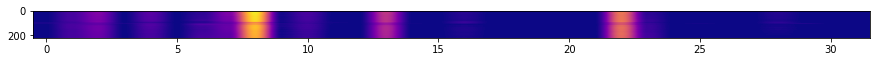



Value of i is [75]
feature_map.shape is [(222, 32)]


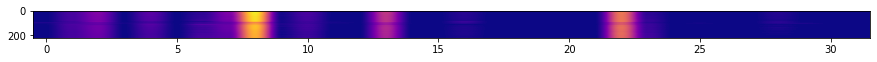



Value of i is [76]
feature_map.shape is [(222, 32)]


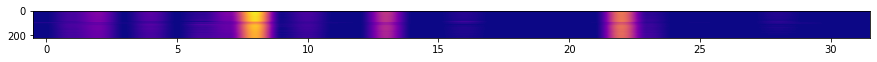



Value of i is [77]
feature_map.shape is [(222, 32)]


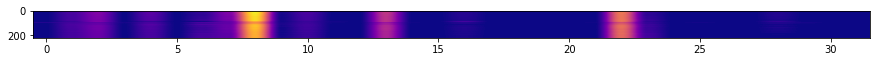



Value of i is [78]
feature_map.shape is [(222, 32)]


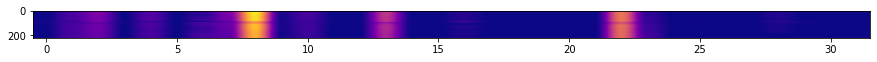



Value of i is [79]
feature_map.shape is [(222, 32)]


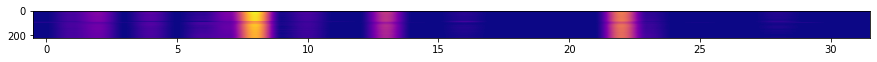



Value of i is [80]
feature_map.shape is [(222, 32)]


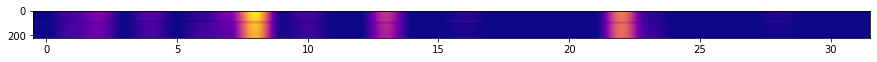



Value of i is [81]
feature_map.shape is [(222, 32)]


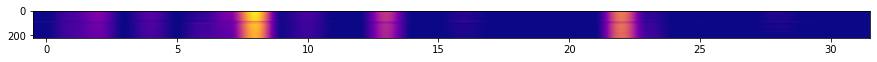



Value of i is [82]
feature_map.shape is [(222, 32)]


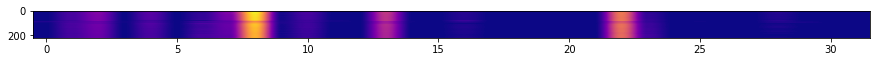



Value of i is [83]
feature_map.shape is [(222, 32)]


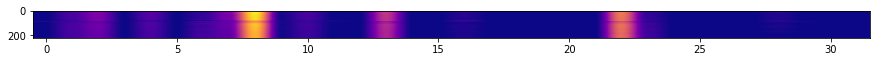



Value of i is [84]
feature_map.shape is [(222, 32)]


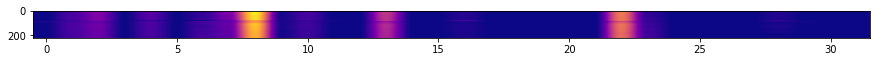



Value of i is [85]
feature_map.shape is [(222, 32)]


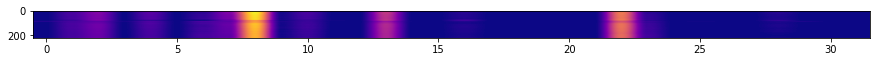



Value of i is [86]
feature_map.shape is [(222, 32)]


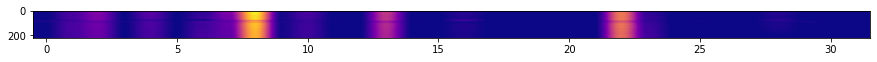



Value of i is [87]
feature_map.shape is [(222, 32)]


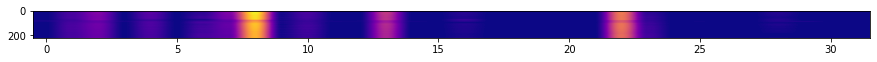



Value of i is [88]
feature_map.shape is [(222, 32)]


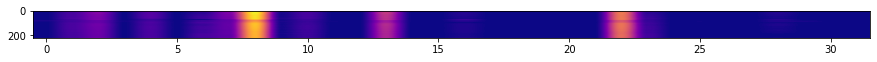



Value of i is [89]
feature_map.shape is [(222, 32)]


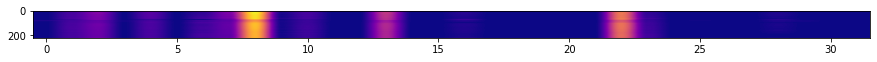



Value of i is [90]
feature_map.shape is [(222, 32)]


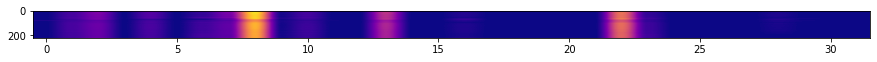



Value of i is [91]
feature_map.shape is [(222, 32)]


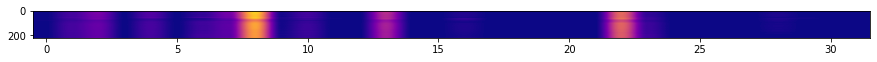



Value of i is [92]
feature_map.shape is [(222, 32)]


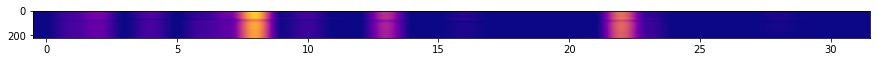



Value of i is [93]
feature_map.shape is [(222, 32)]


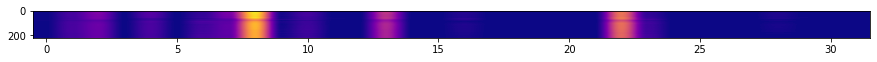



Value of i is [94]
feature_map.shape is [(222, 32)]


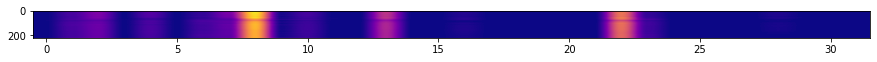



Value of i is [95]
feature_map.shape is [(222, 32)]


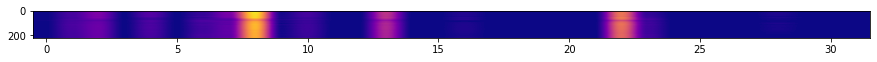



Value of i is [96]
feature_map.shape is [(222, 32)]


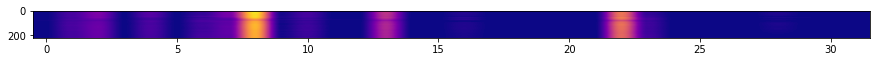



Value of i is [97]
feature_map.shape is [(222, 32)]


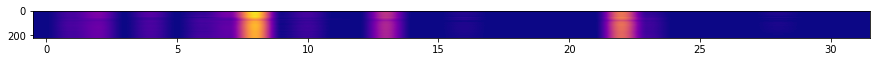



Value of i is [98]
feature_map.shape is [(222, 32)]


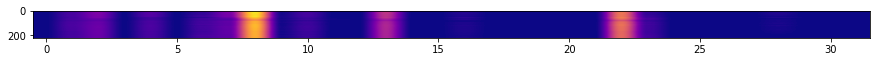



Value of i is [99]
feature_map.shape is [(222, 32)]


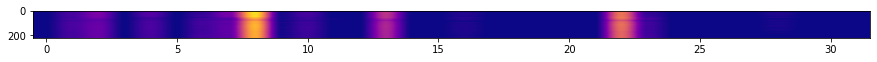



Value of i is [100]
feature_map.shape is [(222, 32)]


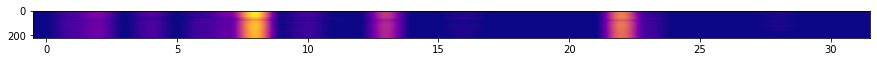



Value of i is [101]
feature_map.shape is [(222, 32)]


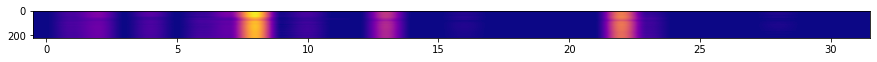



Value of i is [102]
feature_map.shape is [(222, 32)]


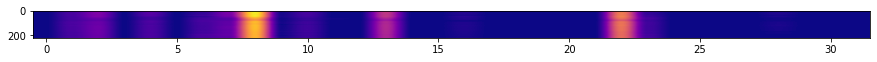



Value of i is [103]
feature_map.shape is [(222, 32)]


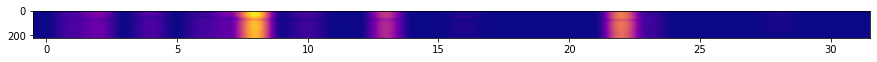



Value of i is [104]
feature_map.shape is [(222, 32)]


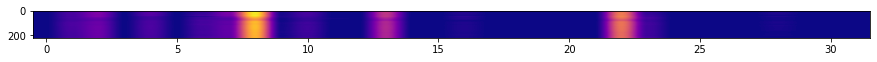



Value of i is [105]
feature_map.shape is [(222, 32)]


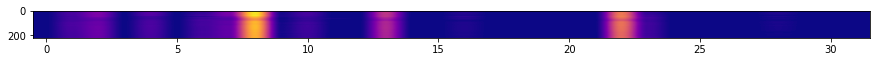



Value of i is [106]
feature_map.shape is [(222, 32)]


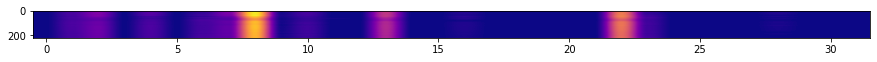



Value of i is [107]
feature_map.shape is [(222, 32)]


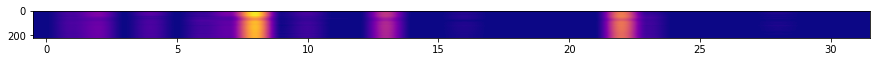



Value of i is [108]
feature_map.shape is [(222, 32)]


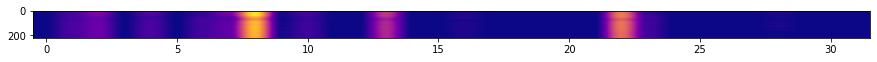



Value of i is [109]
feature_map.shape is [(222, 32)]


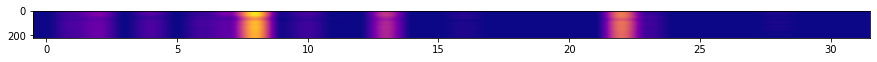



Value of i is [110]
feature_map.shape is [(222, 32)]


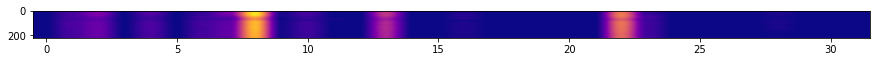



Value of i is [111]
feature_map.shape is [(222, 32)]


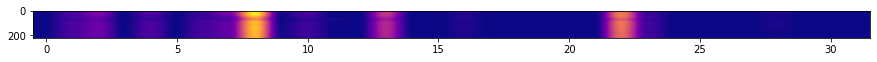



Value of i is [112]
feature_map.shape is [(222, 32)]


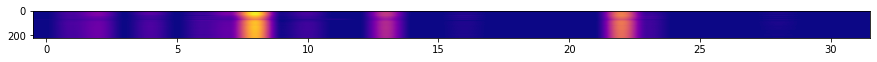



Value of i is [113]
feature_map.shape is [(222, 32)]


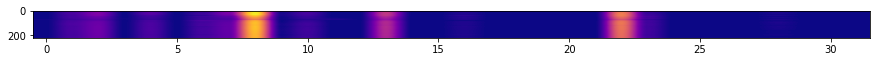



Value of i is [114]
feature_map.shape is [(222, 32)]


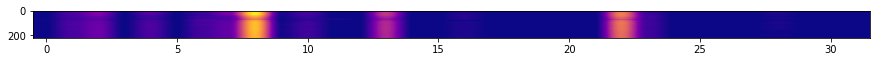



Value of i is [115]
feature_map.shape is [(222, 32)]


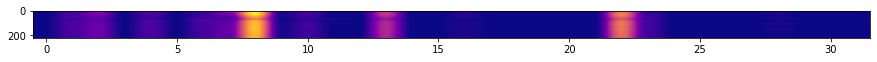



Value of i is [116]
feature_map.shape is [(222, 32)]


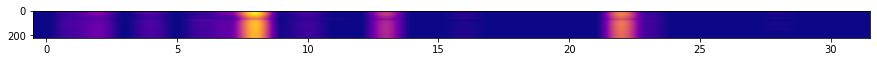



Value of i is [117]
feature_map.shape is [(222, 32)]


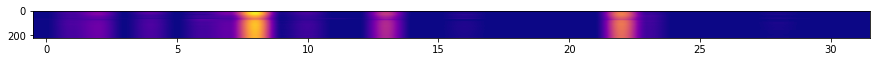



Value of i is [118]
feature_map.shape is [(222, 32)]


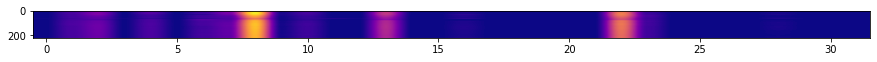



Value of i is [119]
feature_map.shape is [(222, 32)]


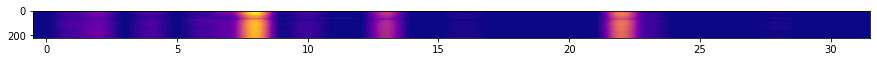



Value of i is [120]
feature_map.shape is [(222, 32)]


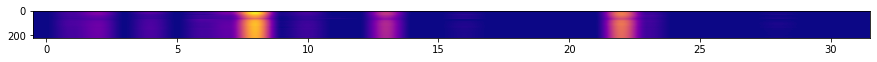



Value of i is [121]
feature_map.shape is [(222, 32)]


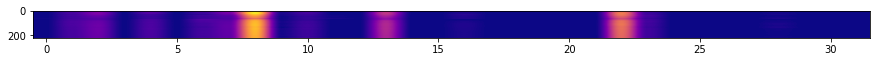



Value of i is [122]
feature_map.shape is [(222, 32)]


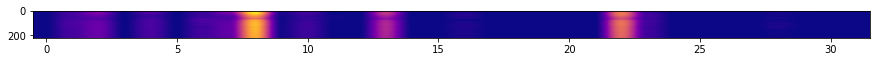



Value of i is [123]
feature_map.shape is [(222, 32)]


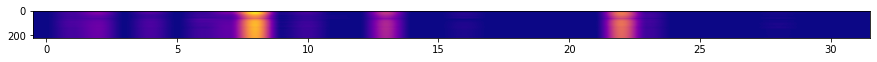



Value of i is [124]
feature_map.shape is [(222, 32)]


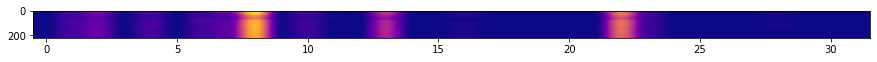



Value of i is [125]
feature_map.shape is [(222, 32)]


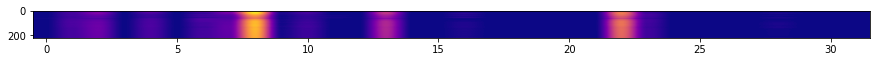



Value of i is [126]
feature_map.shape is [(222, 32)]


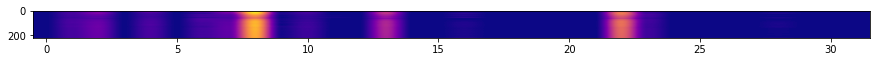



Value of i is [127]
feature_map.shape is [(222, 32)]


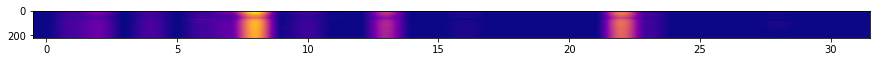



Value of i is [128]
feature_map.shape is [(222, 32)]


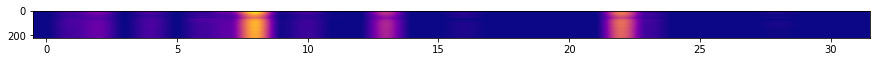



Value of i is [129]
feature_map.shape is [(222, 32)]


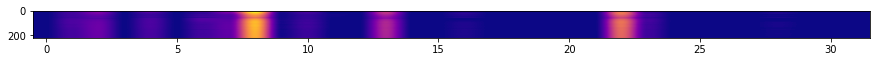



Value of i is [130]
feature_map.shape is [(222, 32)]


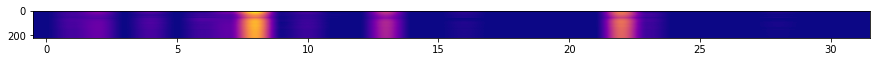



Value of i is [131]
feature_map.shape is [(222, 32)]


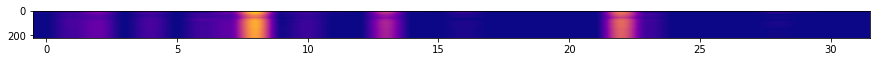



Value of i is [132]
feature_map.shape is [(222, 32)]


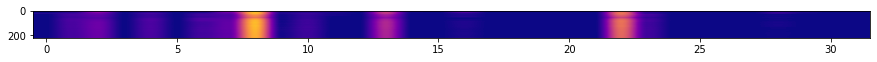



Value of i is [133]
feature_map.shape is [(222, 32)]


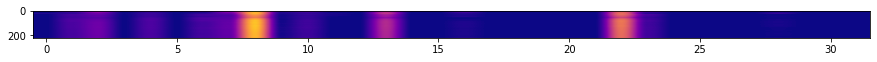



Value of i is [134]
feature_map.shape is [(222, 32)]


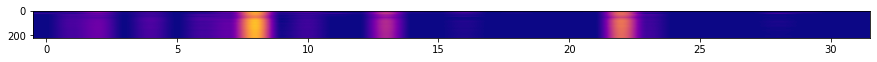



Value of i is [135]
feature_map.shape is [(222, 32)]


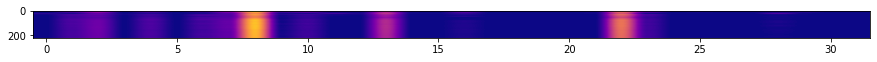



Value of i is [136]
feature_map.shape is [(222, 32)]


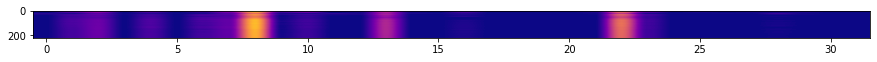



Value of i is [137]
feature_map.shape is [(222, 32)]


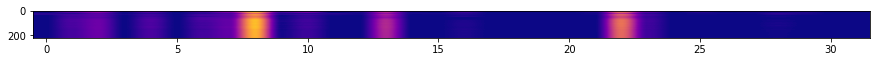



Value of i is [138]
feature_map.shape is [(222, 32)]


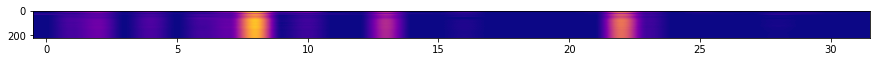



Value of i is [139]
feature_map.shape is [(222, 32)]


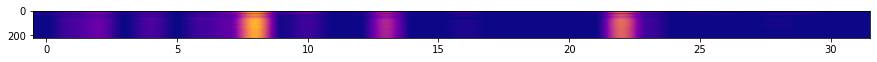



Value of i is [140]
feature_map.shape is [(222, 32)]


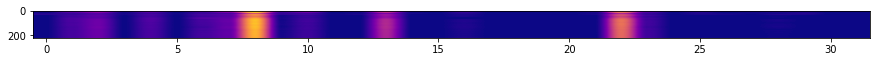



Value of i is [141]
feature_map.shape is [(222, 32)]


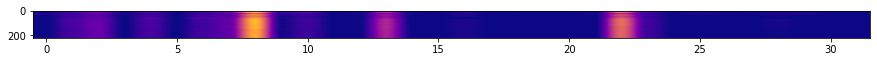



Value of i is [142]
feature_map.shape is [(222, 32)]


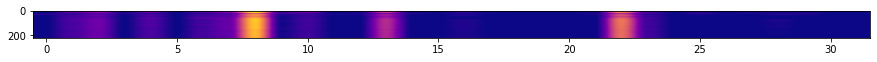



Value of i is [143]
feature_map.shape is [(222, 32)]


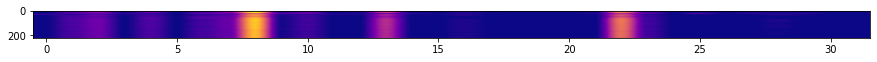



Value of i is [144]
feature_map.shape is [(222, 32)]


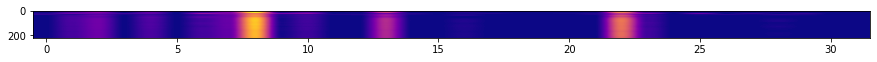



Value of i is [145]
feature_map.shape is [(222, 32)]


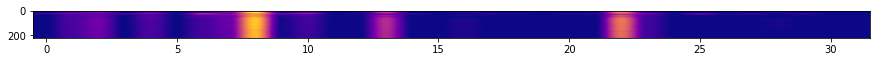



Value of i is [146]
feature_map.shape is [(222, 32)]


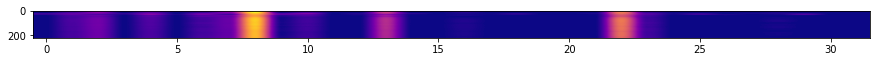



Value of i is [147]
feature_map.shape is [(222, 32)]


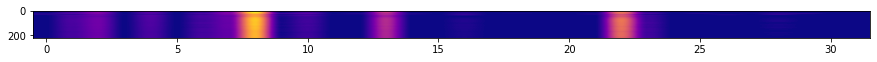



Value of i is [148]
feature_map.shape is [(222, 32)]


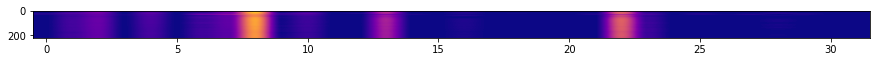



Value of i is [149]
feature_map.shape is [(222, 32)]


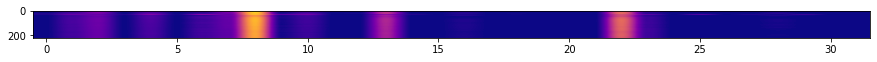



Value of i is [150]
feature_map.shape is [(222, 32)]


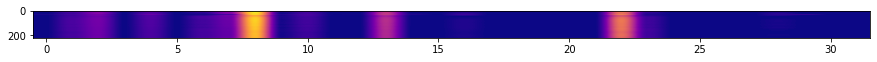



Value of i is [151]
feature_map.shape is [(222, 32)]


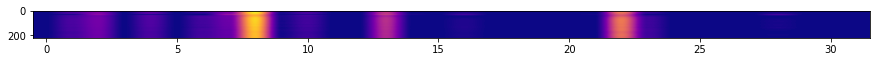



Value of i is [152]
feature_map.shape is [(222, 32)]


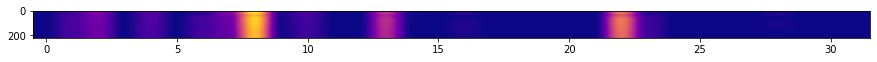



Value of i is [153]
feature_map.shape is [(222, 32)]


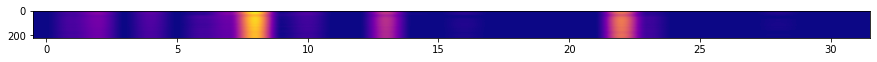



Value of i is [154]
feature_map.shape is [(222, 32)]


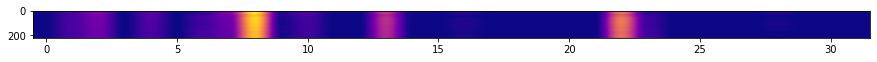



Value of i is [155]
feature_map.shape is [(222, 32)]


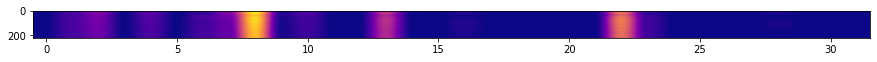



Value of i is [156]
feature_map.shape is [(222, 32)]


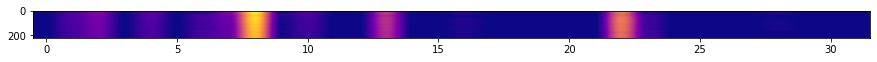



Value of i is [157]
feature_map.shape is [(222, 32)]


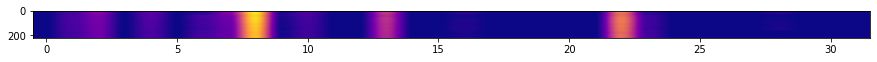



Value of i is [158]
feature_map.shape is [(222, 32)]


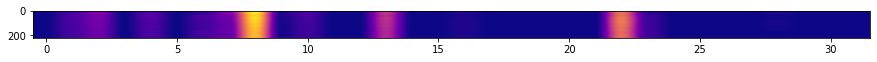



Value of i is [159]
feature_map.shape is [(222, 32)]


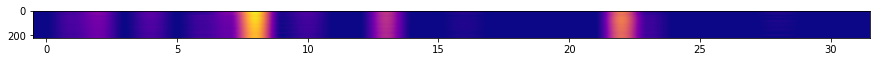



Value of i is [160]
feature_map.shape is [(222, 32)]


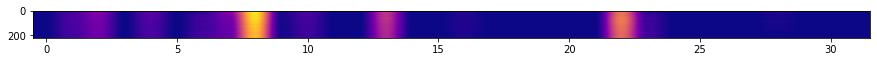



Value of i is [161]
feature_map.shape is [(222, 32)]


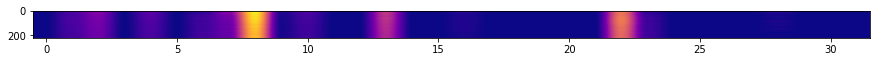



Value of i is [162]
feature_map.shape is [(222, 32)]


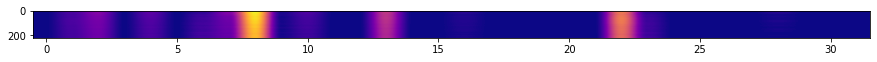



Value of i is [163]
feature_map.shape is [(222, 32)]


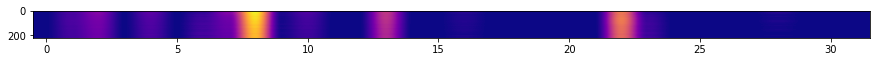



Value of i is [164]
feature_map.shape is [(222, 32)]


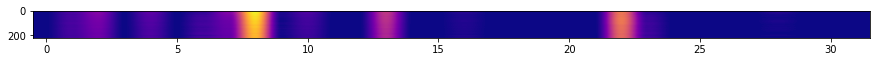



Value of i is [165]
feature_map.shape is [(222, 32)]


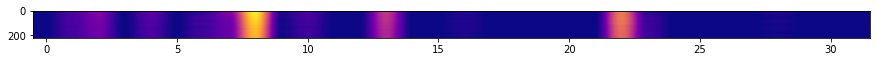



Value of i is [166]
feature_map.shape is [(222, 32)]


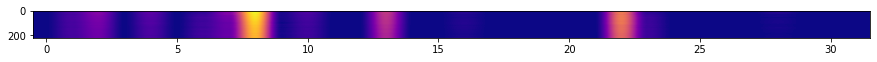



Value of i is [167]
feature_map.shape is [(222, 32)]


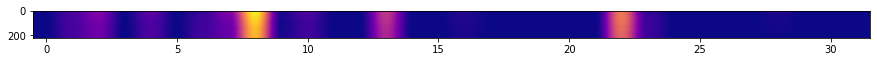



Value of i is [168]
feature_map.shape is [(222, 32)]


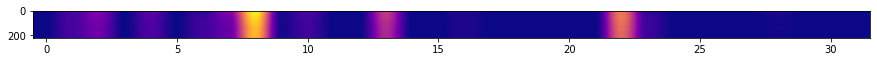



Value of i is [169]
feature_map.shape is [(222, 32)]


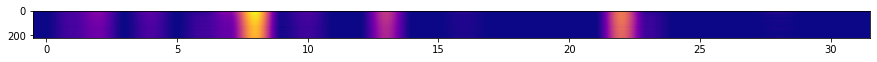



Value of i is [170]
feature_map.shape is [(222, 32)]


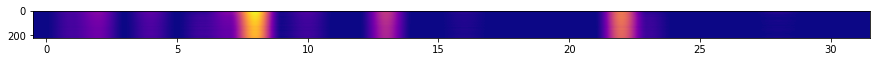



Value of i is [171]
feature_map.shape is [(222, 32)]


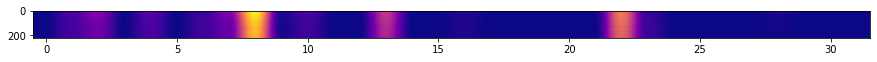



Value of i is [172]
feature_map.shape is [(222, 32)]


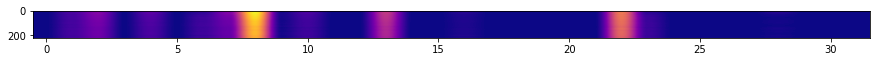



Value of i is [173]
feature_map.shape is [(222, 32)]


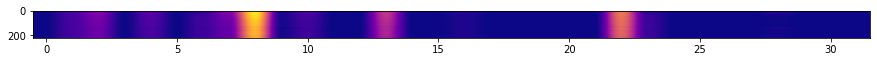



Value of i is [174]
feature_map.shape is [(222, 32)]


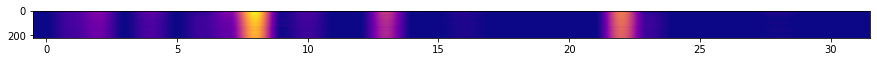



Value of i is [175]
feature_map.shape is [(222, 32)]


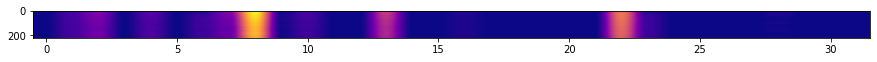



Value of i is [176]
feature_map.shape is [(222, 32)]


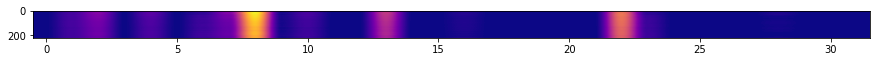



Value of i is [177]
feature_map.shape is [(222, 32)]


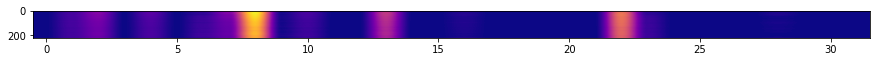



Value of i is [178]
feature_map.shape is [(222, 32)]


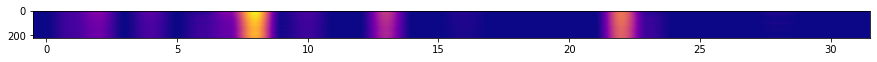



Value of i is [179]
feature_map.shape is [(222, 32)]


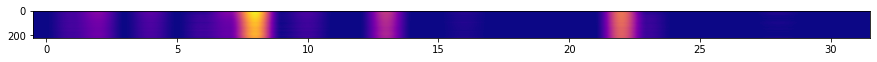



Value of i is [180]
feature_map.shape is [(222, 32)]


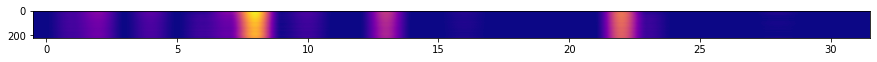



Value of i is [181]
feature_map.shape is [(222, 32)]


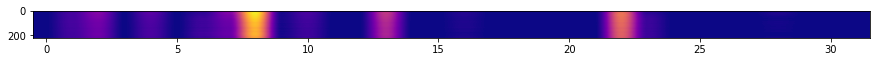



Value of i is [182]
feature_map.shape is [(222, 32)]


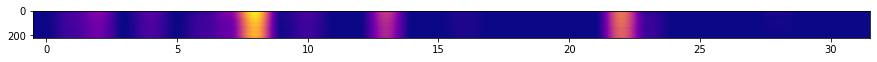



Value of i is [183]
feature_map.shape is [(222, 32)]


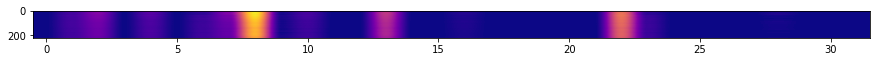



Value of i is [184]
feature_map.shape is [(222, 32)]


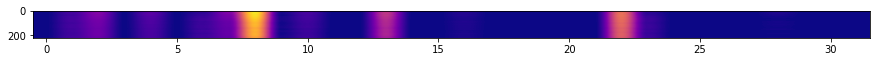



Value of i is [185]
feature_map.shape is [(222, 32)]


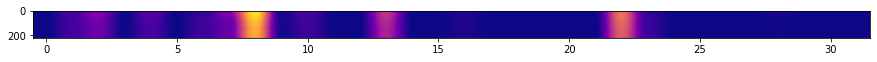



Value of i is [186]
feature_map.shape is [(222, 32)]


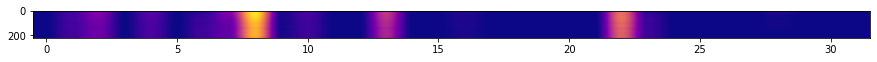



Value of i is [187]
feature_map.shape is [(222, 32)]


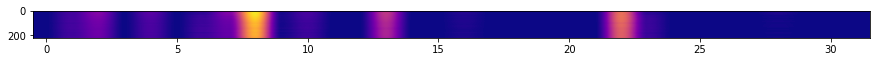



Value of i is [188]
feature_map.shape is [(222, 32)]


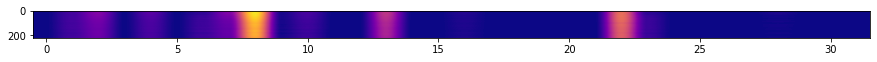



Value of i is [189]
feature_map.shape is [(222, 32)]


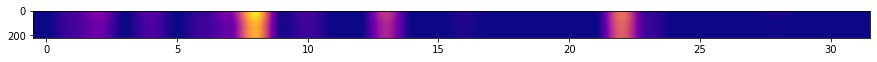



Value of i is [190]
feature_map.shape is [(222, 32)]


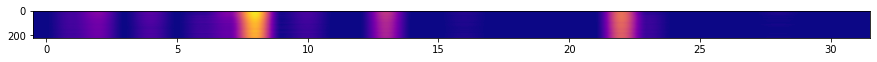



Value of i is [191]
feature_map.shape is [(222, 32)]


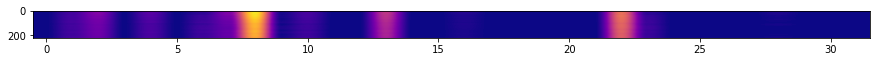



Value of i is [192]
feature_map.shape is [(222, 32)]


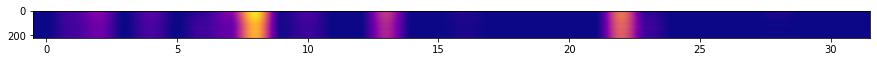



Value of i is [193]
feature_map.shape is [(222, 32)]


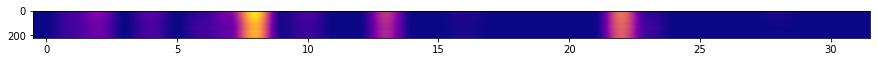



Value of i is [194]
feature_map.shape is [(222, 32)]


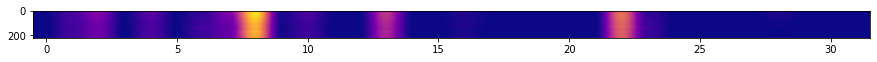



Value of i is [195]
feature_map.shape is [(222, 32)]


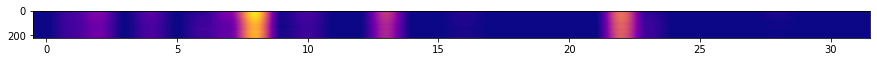



Value of i is [196]
feature_map.shape is [(222, 32)]


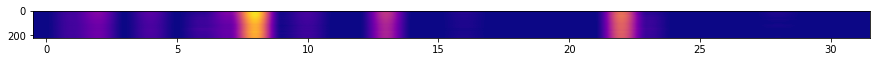



Value of i is [197]
feature_map.shape is [(222, 32)]


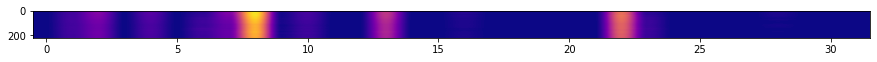



Value of i is [198]
feature_map.shape is [(222, 32)]


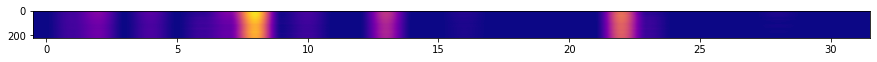



Value of i is [199]
feature_map.shape is [(222, 32)]


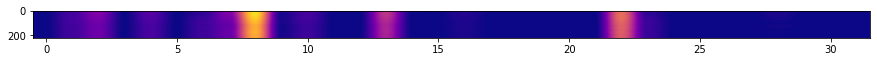



Value of i is [200]
feature_map.shape is [(222, 32)]


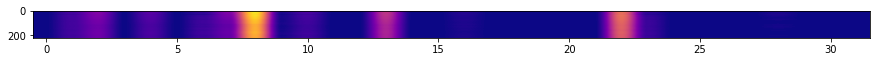



Value of i is [201]
feature_map.shape is [(222, 32)]


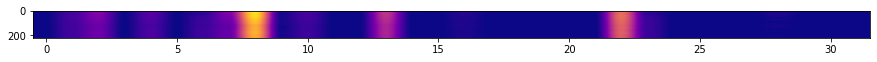



Value of i is [202]
feature_map.shape is [(222, 32)]


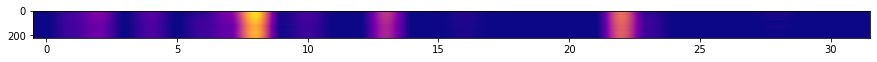



Value of i is [203]
feature_map.shape is [(222, 32)]


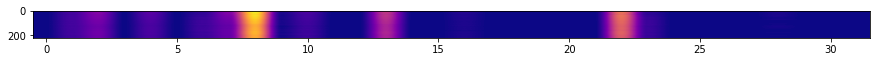



Value of i is [204]
feature_map.shape is [(222, 32)]


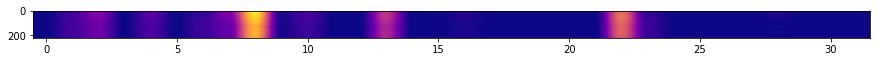



Value of i is [205]
feature_map.shape is [(222, 32)]


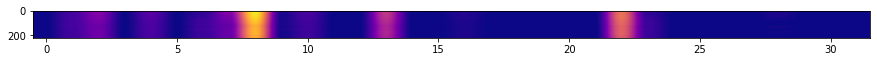



Value of i is [206]
feature_map.shape is [(222, 32)]


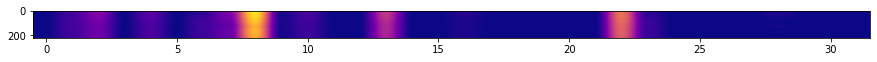



Value of i is [207]
feature_map.shape is [(222, 32)]


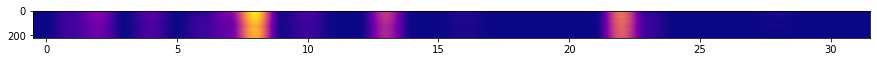



Value of i is [208]
feature_map.shape is [(222, 32)]


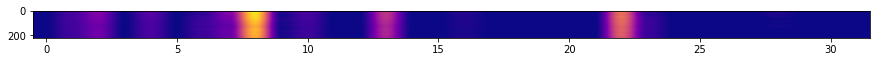



Value of i is [209]
feature_map.shape is [(222, 32)]


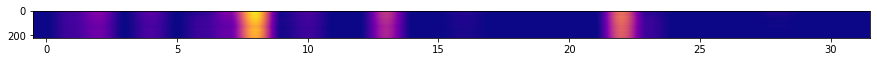



Value of i is [210]
feature_map.shape is [(222, 32)]


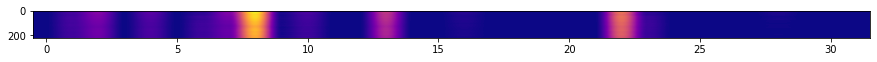



Value of i is [211]
feature_map.shape is [(222, 32)]


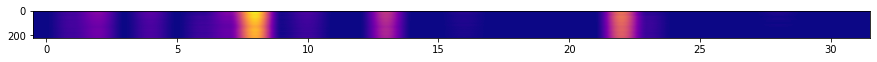



Value of i is [212]
feature_map.shape is [(222, 32)]


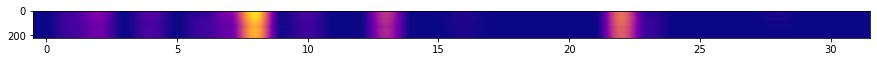



Value of i is [213]
feature_map.shape is [(222, 32)]


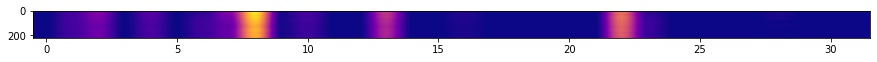



Value of i is [214]
feature_map.shape is [(222, 32)]


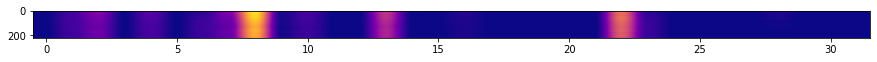



Value of i is [215]
feature_map.shape is [(222, 32)]


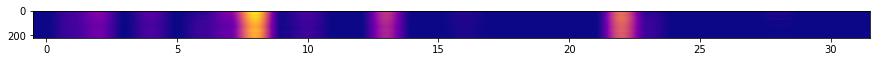



Value of i is [216]
feature_map.shape is [(222, 32)]


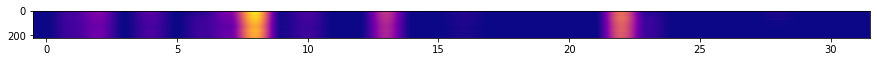



Value of i is [217]
feature_map.shape is [(222, 32)]


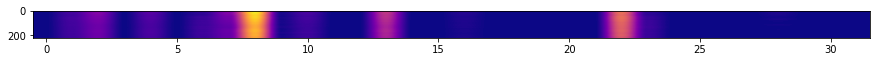



Value of i is [218]
feature_map.shape is [(222, 32)]


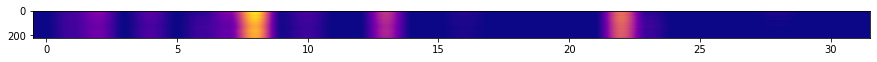



Value of i is [219]
feature_map.shape is [(222, 32)]


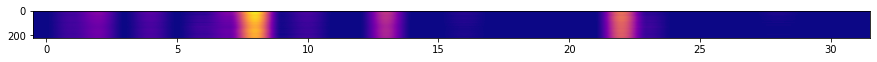



Value of i is [220]
feature_map.shape is [(222, 32)]


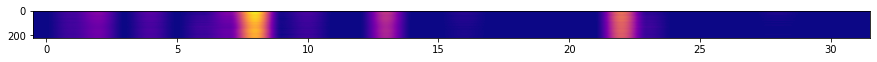



Value of i is [221]
feature_map.shape is [(222, 32)]


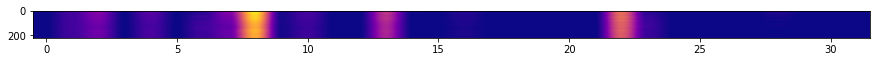

In [ ]:
print(textForVarWithDesc(len(feature_maps[0]), 'len(feature_maps[0])'))

# Plot the feature maps
for i, feature_map in enumerate(feature_maps[0]):
  #plt.subplot(56, 4, i + 1)
  print(textForVarWithDesc(i, '\n\nValue of i'))
  #plt.figure(figsize=(10, 5))
  #plt.imshow(feature_map, cmap='gray')

  print(textForVarWithDesc(feature_map.shape, 'feature_map.shape'))
  fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))
  ax.imshow(feature_map, cmap='plasma', aspect='auto')

  plt.show()
  #break

To visualize the training history, we use the matplotlib library to plot the training and validation accuracy and loss over time:

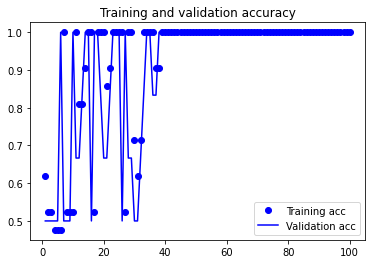

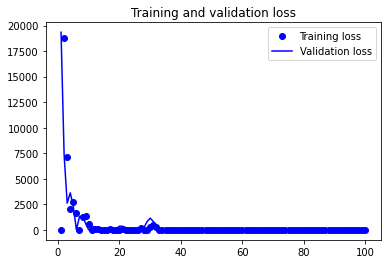

In [ ]:

# Import the necessary modules
import matplotlib.pyplot as plt

# Extract the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 160ms/step


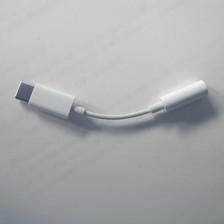

predictions[i] is [[1.]]
=> Object found in search image 0







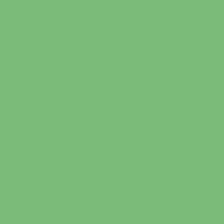

predictions[i] is [[0.]]
Object not found in search image 1





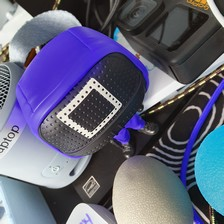

predictions[i] is [[0.]]
Object not found in search image 2





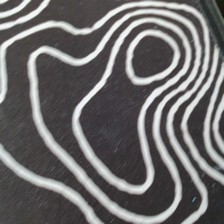

predictions[i] is [[0.]]
Object not found in search image 3





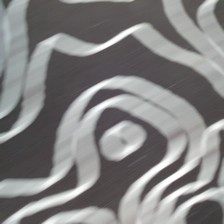

predictions[i] is [[1.]]
=> Object found in search image 4







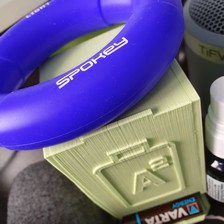

predictions[i] is [[0.]]
Object not found in search image 5





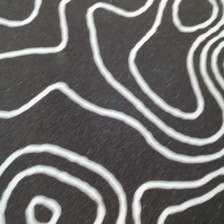

predictions[i] is [[0.]]
Object not found in search image 6





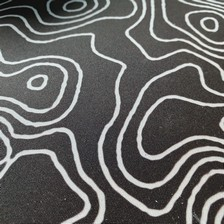

predictions[i] is [[0.]]
Object not found in search image 7





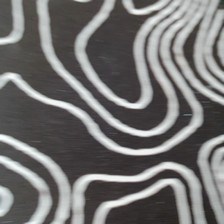

predictions[i] is [[0.]]
Object not found in search image 8





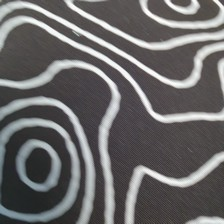

predictions[i] is [[0.]]
Object not found in search image 9





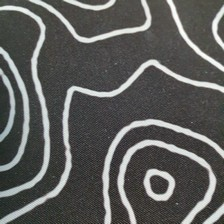

predictions[i] is [[0.]]
Object not found in search image 10





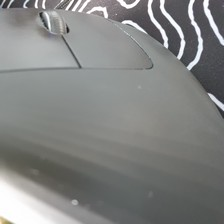

predictions[i] is [[1.]]
=> Object found in search image 11







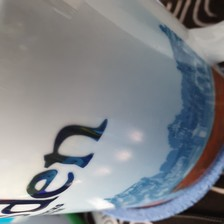

predictions[i] is [[1.]]
=> Object found in search image 12







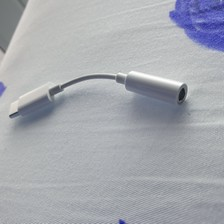

predictions[i] is [[1.]]
=> Object found in search image 13







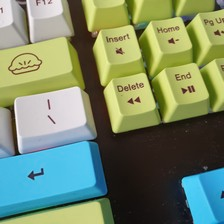

predictions[i] is [[0.]]
Object not found in search image 14





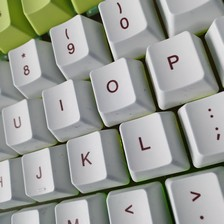

predictions[i] is [[0.]]
Object not found in search image 15





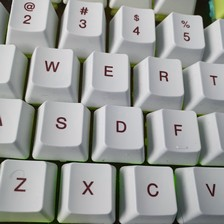

predictions[i] is [[1.]]
=> Object found in search image 16







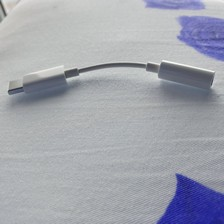

predictions[i] is [[1.]]
=> Object found in search image 17







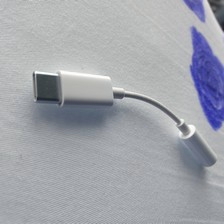

predictions[i] is [[1.]]
=> Object found in search image 18







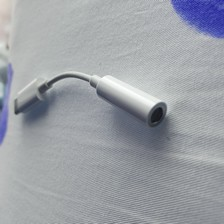

predictions[i] is [[1.]]
=> Object found in search image 19







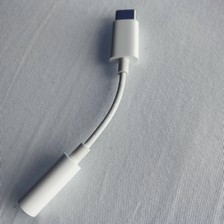

predictions[i] is [[1.]]
=> Object found in search image 20







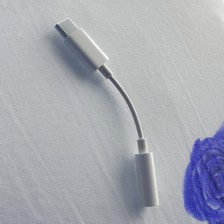

predictions[i] is [[1.]]
=> Object found in search image 21







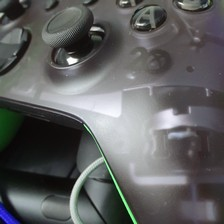

predictions[i] is [[1.]]
=> Object found in search image 22







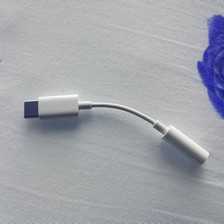

predictions[i] is [[1.]]
=> Object found in search image 23







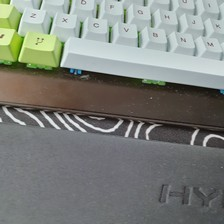

predictions[i] is [[0.]]
Object not found in search image 24





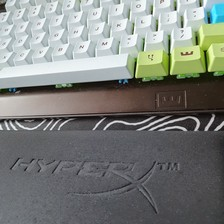

predictions[i] is [[0.]]
Object not found in search image 25





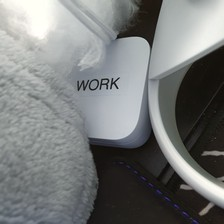

predictions[i] is [[1.]]
=> Object found in search image 26







In [ ]:
# Generate predictions for the search images
predictions = model.predict(search_images)

# Set the threshold
threshold = 0.5

# Loop through the predictions
for i in range(len(predictions)):
  cv2_imshow(search_images[i])
  print(textForVarWithDesc(predictions[i], 'predictions[i]'))
  # If the prediction is greater than the threshold, print "Object found"
  if predictions[i] > threshold:
    print(f"=> Object found in search image {i}\n\n\n\n\n")
  # Otherwise, print "Object not found"
  else:
    print(f"Object not found in search image {i}\n\n\n")


In [ ]:
print('*** END PROGRAM ********************************************************')


*** END PROGRAM ********************************************************
